<h1> Medicine Reccomender

<h2> Step 1: Setup

<h3><u> Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h3><u> Loading Data


In [2]:
data = pd.read_csv("Medicine Dataset.csv")
data.head(10)

,id,name,price(₹),Is_discontinued,manufacturer_name,type,pack_size_label,short_composition1,short_composition2
0,1,Augmentin 625 Duo Tablet,223.42,False,Glaxo SmithKline Pharmaceuticals Ltd,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg)
1,2,Azithral 500 Tablet,132.36,False,Alembic Pharmaceuticals Ltd,allopathy,strip of 5 tablets,Azithromycin (500mg),NaN
2,3,Ascoril LS Syrup,118.00,False,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Ambroxol (30mg/5ml),Levosalbutamol (1mg/5ml)
3,4,Allegra 120mg Tablet,218.81,False,Sanofi India Ltd,allopathy,strip of 10 tablets,Fexofenadine (120mg),NaN
4,5,Avil 25 Tablet,10.96,False,Sanofi India Ltd,allopathy,strip of 15 tablets,Pheniramine (25mg),NaN
5,6,Allegra-M Tablet,241.48,False,Sanofi India Ltd,allopathy,strip of 10 tablets,Montelukast (10mg),Fexofenadine (120mg)
6,7,Amoxyclav 625 Tablet,223.27,False,Abbott,allopathy,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg)
7,8,Azee 500 Tablet,132.38,False,Cipla Ltd,allopathy,strip of 5 tablets,Azithromycin (500mg),NaN
8,9,Atarax 25mg Tablet,85.50,False,Dr Reddy's Laboratories Ltd,allopathy,strip of 15 tablets,Hydroxyzine (25mg),NaN
9,10,Ascoril D Plus Syrup Sugar Free,129.00,False,Glenmark Pharmaceuticals Ltd,allopathy,bottle of 100 ml Syrup,Phenylephrine (5mg),Chlorpheniramine Maleate (2mg)


<h2> Step 2: Data Analysis

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253973 entries, 0 to 253972
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  253973 non-null  int64  
 1   name                253973 non-null  object 
 2   price(₹)            253973 non-null  float64
 3   Is_discontinued     253973 non-null  bool   
 4   manufacturer_name   253973 non-null  object 
 5   type                253973 non-null  object 
 6   pack_size_label     253973 non-null  object 
 7   short_composition1  253973 non-null  object 
 8   short_composition2  112171 non-null  object 
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 15.7+ MB


In [55]:
#unique values
data.nunique()

id                    253973
name                  249398
price(₹)               20664
Is_discontinued            2
manufacturer_name       7648
type                       1
pack_size_label         1929
short_composition1      8523
short_composition2      2980
dtype: int64

In [56]:
#missing values
data.isnull().sum()

id                         0
name                       0
price(₹)                   0
Is_discontinued            0
manufacturer_name          0
type                       0
pack_size_label            0
short_composition1         0
short_composition2    141802
dtype: int64

In [57]:
#dropping type column as it has just 1 value, i.e. allopathy
#dropping id as no need of that
data = data.drop(columns=['type', 'id'])

In [58]:
#Filtering data to just keep the medicines that are not discontinued
data = data[data['Is_discontinued'] == False]

#We can drop the Id_discontinued column now
data = data.drop(columns='Is_discontinued')

In [59]:
data.head(10)

,name,price(₹),manufacturer_name,pack_size_label,short_composition1,short_composition2
0,Augmentin 625 Duo Tablet,223.42,Glaxo SmithKline Pharmaceuticals Ltd,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg)
1,Azithral 500 Tablet,132.36,Alembic Pharmaceuticals Ltd,strip of 5 tablets,Azithromycin (500mg),NaN
2,Ascoril LS Syrup,118.00,Glenmark Pharmaceuticals Ltd,bottle of 100 ml Syrup,Ambroxol (30mg/5ml),Levosalbutamol (1mg/5ml)
3,Allegra 120mg Tablet,218.81,Sanofi India Ltd,strip of 10 tablets,Fexofenadine (120mg),NaN
4,Avil 25 Tablet,10.96,Sanofi India Ltd,strip of 15 tablets,Pheniramine (25mg),NaN
5,Allegra-M Tablet,241.48,Sanofi India Ltd,strip of 10 tablets,Montelukast (10mg),Fexofenadine (120mg)
6,Amoxyclav 625 Tablet,223.27,Abbott,strip of 10 tablets,Amoxycillin (500mg),Clavulanic Acid (125mg)
7,Azee 500 Tablet,132.38,Cipla Ltd,strip of 5 tablets,Azithromycin (500mg),NaN
8,Atarax 25mg Tablet,85.50,Dr Reddy's Laboratories Ltd,strip of 15 tablets,Hydroxyzine (25mg),NaN
9,Ascoril D Plus Syrup Sugar Free,129.00,Glenmark Pharmaceuticals Ltd,bottle of 100 ml Syrup,Phenylephrine (5mg),Chlorpheniramine Maleate (2mg)


In [60]:
#Handling pack size
from collections import Counter
count = Counter()

def to_singular(word):
    if word.endswith('s') and len(word) > 1:
        return word[:-1]
    else:
        return word

for label in data['pack_size_label']:
    words = label.split()
    x = words[-1].lower()

    if len(x) < 3:
        x = words[-2].lower()
    x = to_singular(x)
    count[x] += 1

forms = dict(count.most_common())

In [61]:
print(forms)

{'tablet': 147911, 'injection': 31057, 'capsule': 21438, 'syrup': 16415, 'suspension': 9023, 'drop': 5085, 'cream': 4867, 'solution': 1634, 'gel': 1581, 'ointment': 1574, 'lotion': 990, 'infusion': 837, 'soap': 515, 'powder': 344, 'spray': 331, 'expectorant': 321, 'shampoo': 262, 'kit': 229, 'inhaler': 211, 'wash': 193, 'liquid': 140, 'granule': 115, 'respule': 111, 'suppositorie': 70, 'strip': 62, 'sachet': 58, 'rotacap': 51, 'gargle': 51, 'patche': 47, 'suppository': 32, 'paint': 32, 'inhalation': 28, 'syringe': 27, 'respicap': 24, 'emulsion': 23, 'transcap': 23, 'lozenge': 21, 'linctu': 19, 'pessarie': 18, 'transhaler': 18, 'paste': 17, 'bottle': 17, 'combikit': 17, 'toothpaste': 16, 'patch': 16, 'gum': 14, 'transpule': 11, 'combipack': 9, 'scrub': 9, 'serum': 9, 'jelly': 8, 'lacquer': 7, 'tabcap': 7, 'enema': 7, 'husk': 6, 'liniment': 6, 'cartrige': 6, 'instacap': 5, 'caplet': 5, 'redicap': 5, 'pastille': 4, 'elixir': 4, 'foam': 4, 'nexcap': 4, 'pellet': 4, 'pouch': 4, 'bar': 3, 'p

In [62]:
def getType(row):  
    for type in forms:
        if type in row['pack_size_label'].lower():
            return type  

data['type'] = data.apply(getType, axis= 1)

In [63]:
data['type'].unique()

array(['tablet', 'syrup', 'cream', 'suspension', 'capsule', 'inhaler',
       'injection', 'expectorant', 'strip', 'respule', 'drop', 'kit',
       'spray', 'gel', 'solution', 'infusion', 'lotion', 'ointment',
       'rotacap', 'bottle', 'granule', 'liquid', 'sachet', 'instacap',
       'soap', 'suppositorie', 'powder', 'paste', 'pastille', 'shampoo',
       'pessarie', 'bio-adhesive', 'bar', 'wash', 'gargle', 'linctu',
       'emulsion', 'syringe', 'gum', 'transhaler', 'transcap', 'patche',
       'transpule', 'scrub', 'jelly', 'patch', 'nebuliser', 'pack', 'pen',
       'oxipule', 'paint', 'suppository', 'lozenge', 'redicap',
       'respicap', 'system', 'autohaler', 'bandage', 'novocart',
       'diskette', 'cartrige', 'husk', 'nexcap', 'conditioner', 'enema',
       'unit', 'vaccine', 'vial', 'pellet', 'oxycap', 'pouch'],
      dtype=object)

In [64]:
missingdata = data['type'].isnull()

In [65]:
data['primary_comp'] = data['short_composition1'].str.split('(').str[0].str.lower().str.rstrip()
data['value'] = data['short_composition1'].str.split('(').str[1].str.lower().str.rstrip().str.rstrip(')').fillna('')

data['entire_comp'] = data['primary_comp'] + ' ' + data['short_composition2'].fillna('').str.split('(').str[0].str.lower().str.rstrip()
data['entire_value'] = data['value'] + ' ' + data['short_composition2'].fillna('').str.split('(').str[1].str.lower().str.rstrip().str.rstrip(')').fillna('')

In [67]:
data = data.drop(columns= ['pack_size_label', 'short_composition1', 'short_composition2'])
data.head()

,name,price(₹),manufacturer_name,type,primary_comp,value,entire_comp,entire_value
0,Augmentin 625 Duo Tablet,223.42,Glaxo SmithKline Pharmaceuticals Ltd,tablet,amoxycillin,500mg,amoxycillin clavulanic acid,500mg 125mg
1,Azithral 500 Tablet,132.36,Alembic Pharmaceuticals Ltd,tablet,azithromycin,500mg,azithromycin,500mg
2,Ascoril LS Syrup,118.00,Glenmark Pharmaceuticals Ltd,syrup,ambroxol,30mg/5ml,ambroxol levosalbutamol,30mg/5ml 1mg/5ml
3,Allegra 120mg Tablet,218.81,Sanofi India Ltd,tablet,fexofenadine,120mg,fexofenadine,120mg
4,Avil 25 Tablet,10.96,Sanofi India Ltd,tablet,pheniramine,25mg,pheniramine,25mg


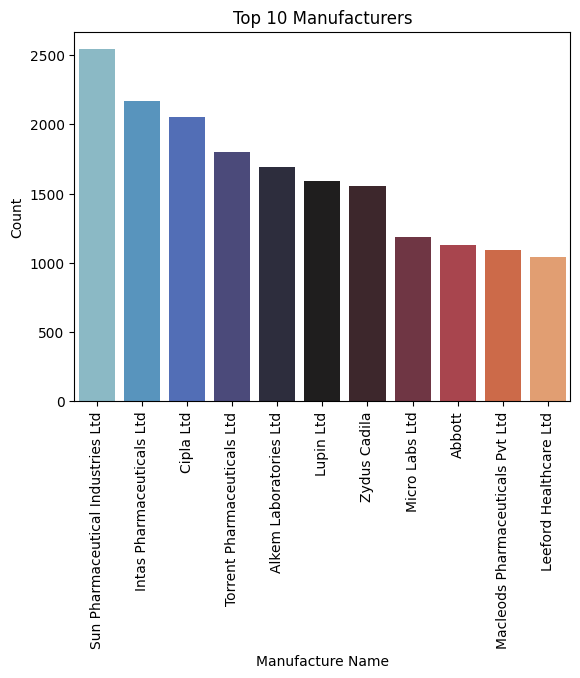

In [86]:
#visualizations
plt.figure()
manufacturer_freq = data['manufacturer_name'].value_counts()[:11].reset_index()
sns.barplot(manufacturer_freq, x='manufacturer_name', y='count', palette='icefire', hue='manufacturer_name')
plt.xlabel('Manufacture Name',)
plt.ylabel('Count')
plt.title('Top 10 Manufacturers')
plt.xticks(rotation=90)
plt.show()

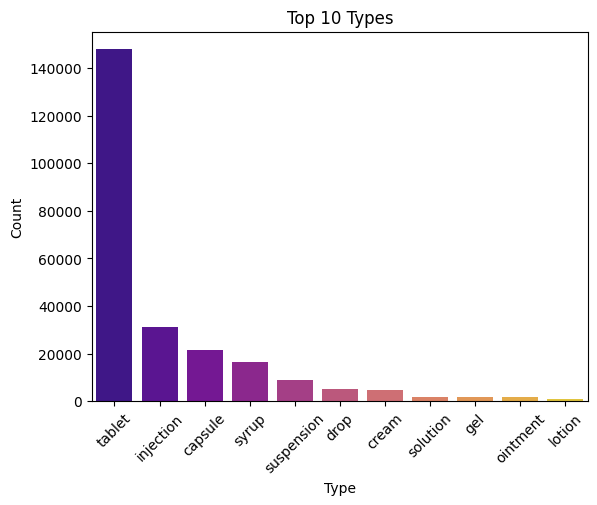

In [84]:
plt.figure()
type_freq = data['type'].value_counts()[:11].reset_index()
sns.barplot(type_freq, x='type', y='count', palette='plasma', hue='type')
plt.xlabel('Type',)
plt.ylabel('Count')
plt.title('Top 10 Types')
plt.xticks(rotation=45)
plt.show()

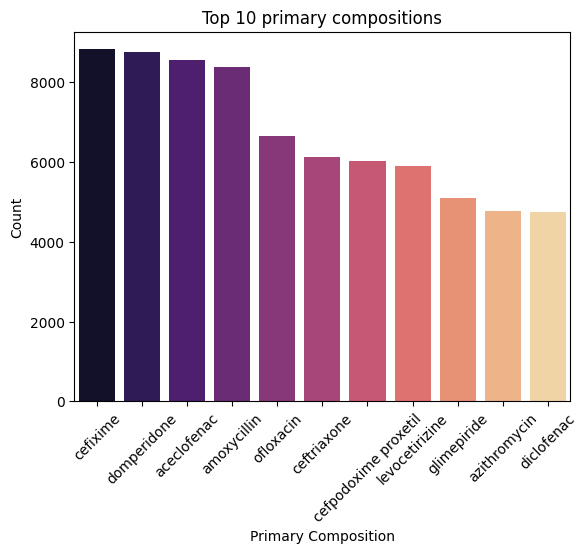

In [83]:
plt.figure()
prim_comp_freq = data['primary_comp'].value_counts()[:11].reset_index()
sns.barplot(prim_comp_freq, x='primary_comp', y='count', palette='magma', hue='primary_comp')
plt.xlabel('Primary Composition')
plt.ylabel('Count')
plt.title('Top 10 primary compositions')
plt.xticks(rotation=45)
plt.show()

In [87]:
data.columns

Index(['name', 'price(₹)', 'manufacturer_name', 'type', 'primary_comp',
       'value', 'entire_comp', 'entire_value'],
      dtype='object')

In [89]:
#Label encoding
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['manufacturer_name', 'type', 'primary_comp',
       'value', 'entire_comp', 'entire_value']

label_encoders = {}

for column in columns_to_encode:
    le = LabelEncoder()
    data[column + '_encoded'] = le.fit_transform(data[column])
    label_encoders[column] = le


In [91]:
data.head(5)

,name,price(₹),manufacturer_name,type,primary_comp,value,entire_comp,entire_value,manufacturer_name_encoded,type_encoded,primary_comp_encoded,value_encoded,entire_comp_encoded,entire_value_encoded
0,Augmentin 625 Duo Tablet,223.42,Glaxo SmithKline Pharmaceuticals Ltd,tablet,amoxycillin,500mg,amoxycillin clavulanic acid,500mg 125mg,2763,63,76,904,185,2828
1,Azithral 500 Tablet,132.36,Alembic Pharmaceuticals Ltd,tablet,azithromycin,500mg,azithromycin,500mg,356,63,121,904,297,2815
2,Ascoril LS Syrup,118.00,Glenmark Pharmaceuticals Ltd,syrup,ambroxol,30mg/5ml,ambroxol levosalbutamol,30mg/5ml 1mg/5ml,2770,61,60,733,135,2346
3,Allegra 120mg Tablet,218.81,Sanofi India Ltd,tablet,fexofenadine,120mg,fexofenadine,120mg,5986,63,564,373,1258,1141
4,Avil 25 Tablet,10.96,Sanofi India Ltd,tablet,pheniramine,25mg,pheniramine,25mg,5986,63,1083,642,2277,2039


In [92]:
data.columns

Index(['name', 'price(₹)', 'manufacturer_name', 'type', 'primary_comp',
       'value', 'entire_comp', 'entire_value', 'manufacturer_name_encoded',
       'type_encoded', 'primary_comp_encoded', 'value_encoded',
       'entire_comp_encoded', 'entire_value_encoded'],
      dtype='object')

In [93]:
weightage = {
    'price(₹)': 0.5,
    'manufacturer_name_encoded': 0.2,
    'type_encoded' : 1, 
    'primary_comp_encoded' : 0.7, 
    'value_encoded' : 0.7,
    'entire_comp_encoded' : 1, 
    'entire_value_encoded': 1
}

In [101]:
#scaling
from sklearn.preprocessing import StandardScaler
features = ['price(₹)', 'manufacturer_name_encoded', 'type_encoded', 'primary_comp_encoded', 
            'value_encoded', 'entire_comp_encoded', 'entire_value_encoded']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

scaled_data = pd.DataFrame(scaled_data, columns= features)


In [100]:
#similarity matrix
from sklearn.metrics.pairwise import cosine_similarity

def calculate_price_similarity(price1, price2):
    price1 = np.array(price1).reshape(1, -1)
    price2 = np.array(price2).reshape(1, -1)
    similarity = cosine_similarity(price1, price2)
    return similarity[0][0]

def calculate_text_similarity(value1, value2):
    similarity = cosine_similarity(value1, value2)
    return similarity[0][0]

In [102]:
def calculate_price_similarity(price1, price2):
    price1 = np.array([[price1]])
    price2 = np.array([[price2]])
    similarity = cosine_similarity(price1, price2)
    return similarity[0][0]

# Calculate similarity between two encoded text features
def calculate_text_similarity(value1, value2):
    value1 = np.array(value1).reshape(1, -1)
    value2 = np.array(value2).reshape(1, -1)
    similarity = cosine_similarity(value1, value2)
    return similarity[0][0]

# Calculate weighted similarity between two medicines
def calculate_weighted_similarity(medicine1, medicine2):
    similarity_scores = []
    for column, weight in weightage.items():
        if column == 'price(₹)':
            similarity = calculate_price_similarity(medicine1[column], medicine2[column])
        else:
            similarity = calculate_text_similarity(medicine1[column], medicine2[column])
        similarity_scores.append(similarity * weight)
    weighted_similarity = sum(similarity_scores)
    return weighted_similarity

In [103]:
medicine1 = data.iloc[46959]  # Example medicine 1
medicine2 = data.iloc[47923]  # Example medicine 2

weighted_similarity = calculate_weighted_similarity(medicine1, medicine2)
print("Weighted Similarity:", weighted_similarity)

Weighted Similarity: 5.1


In [104]:
def get_top_n_similar_medicines(df, target_medicine_index, n=10):
    target_medicine = df.iloc[target_medicine_index]
    similarities = []

    for index, medicine in df.iterrows():
        if index != target_medicine_index:  # Skip the target medicine itself
            similarity = calculate_weighted_similarity(target_medicine, medicine)
            similarities.append((index, similarity))

    # Sort the list of tuples based on similarity score in descending order
    similarities = sorted(similarities, key=lambda x: x[1], reverse=True)

    # Extract the indices of the top N similar medicines
    top_n_indices = [index for index, similarity in similarities[:n]]

    # Return the top N similar medicines
    return df.iloc[top_n_indices]

# Example usage to find top 10 similar medicines for the first medicine in the dataset
top_similar_medicines = get_top_n_similar_medicines(data, 765, n=10)
print(top_similar_medicines)

                              name  price(₹)  \
0         Augmentin 625 Duo Tablet    223.42   
1              Azithral 500 Tablet    132.36   
2                 Ascoril LS Syrup    118.00   
3             Allegra 120mg Tablet    218.81   
4                   Avil 25 Tablet     10.96   
5                 Allegra-M Tablet    241.48   
6             Amoxyclav 625 Tablet    223.27   
7                  Azee 500 Tablet    132.38   
8               Atarax 25mg Tablet     85.50   
9  Ascoril D Plus Syrup Sugar Free    129.00   

                      manufacturer_name    type   primary_comp     value  \
0  Glaxo SmithKline Pharmaceuticals Ltd  tablet    amoxycillin     500mg   
1           Alembic Pharmaceuticals Ltd  tablet   azithromycin     500mg   
2          Glenmark Pharmaceuticals Ltd   syrup       ambroxol  30mg/5ml   
3                     Sanofi India  Ltd  tablet   fexofenadine     120mg   
4                     Sanofi India  Ltd  tablet    pheniramine      25mg   
5              